In [63]:
# Feature Extraction with PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# load data
df_data = pd.read_csv("../data/train_augmented_reduced.csv")
# print(df_data.head())

X_cols = []
for col in df_data.columns:
    X_cols.append(col)

X_cols = X_cols[2:-1]


X1 = df_data[X_cols]
X = X1.drop(columns=['Pawpularity'])
Y = df_data['Pawpularity'].values[:]

# print(X1.shape)
# X.shape

# X.columns

## PCA

In [64]:
# feature extraction
pca = PCA()
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_,"\n")

df = pd.DataFrame(fit.components_, columns=list(X.columns))
print(df)

Explained Variance: [1.53922270e-01 1.41186124e-01 9.75256632e-02 5.86899975e-02
 5.01121535e-02 4.38191132e-02 4.18929329e-02 3.61612453e-02
 3.05765701e-02 2.71512138e-02 2.43782632e-02 2.10763819e-02
 1.74423472e-02 1.63840303e-02 1.59031665e-02 1.56794457e-02
 8.91609504e-03 8.02297209e-03 6.93756979e-03 6.78172536e-03
 6.28259396e-03 6.06960822e-03 6.01260277e-03 5.24475262e-03
 4.90660978e-03 4.65296645e-03 4.51445423e-03 3.99769926e-03
 3.95854332e-03 3.80322665e-03 3.69031805e-03 3.43926351e-03
 3.36463674e-03 3.12406019e-03 2.93469877e-03 2.88841263e-03
 2.73710452e-03 2.56238738e-03 2.50201433e-03 2.37967964e-03
 2.32454707e-03 2.25530533e-03 2.16104282e-03 2.13485510e-03
 2.05518487e-03 1.97279876e-03 1.96239033e-03 1.93666103e-03
 1.81231964e-03 1.76084019e-03 1.68828536e-03 1.66922180e-03
 1.60152149e-03 1.56471467e-03 1.50060085e-03 1.44258601e-03
 1.38638127e-03 1.35260033e-03 1.31438425e-03 1.24690117e-03
 1.23881769e-03 1.22344550e-03 1.21534261e-03 1.19163274e-03
 1.1

In [65]:
# number of components
n_pcs= fit.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(fit.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X_cols[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
print(df)

         0                         1
0      PC0                      Eyes
1      PC1                 Occlusion
2      PC2                      Near
3      PC3            Dungeness crab
4      PC4                     Group
..     ...                       ...
466  PC466       American black bear
467  PC467             parking meter
468  PC468  sulphur-crested cockatoo
469  PC469                sunglasses
470  PC470                   minibus

[471 rows x 2 columns]


reference for ahbove code :
https://stackoverflow.com/questions/47370795/pca-on-sklearn-how-to-interpret-pca-components

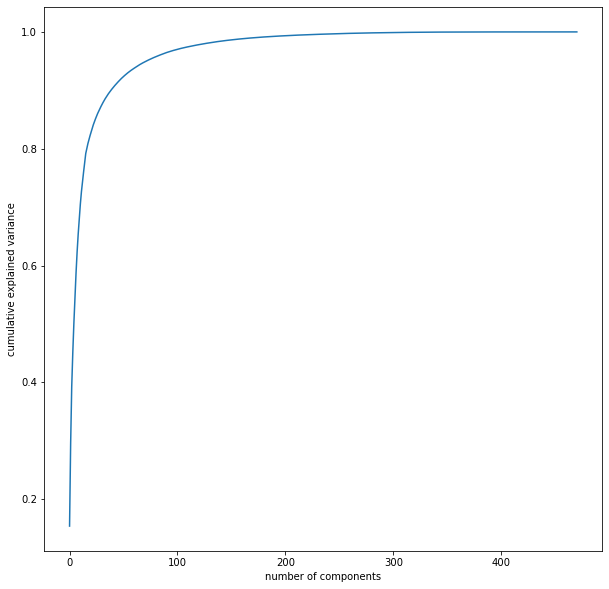

In [68]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(fit.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');